# Projeto 1 - Backtest modelo de investimento Magic Formula.


### Desafio:

* Testar se a regra de investimento da fórmula mágica, do Joel Grenblatt, funcionou no Brasil nos últimos anos.


### Passo a passo:

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Baixar os dados disponibilizados.
   
   **Passo 3** - Pegar as datas que iremos balancear a carteira. 
   
   **Passo 4** - Filtrar  a liquidez.
   
   **Passo 5** - Cria o ranking dos indicadores.
   
   **Passo 6** - Cria as carteiras. 
   
   **Passo 7** - Calcula a rentabilidade por carteira.
   
   **Passo 8** - Calcula a rentabilidade do modelo.

   **Passo 9** - Calcula a rentabilidade do ibovespa no mesmo período.

   **Passo 10** - Analisa os resultados.
   
-------------------

# Passo 1: Importando os módulos necessários

In [41]:
import pandas as pd
import quantstats as qs 

# Passo 2: Baixar os dados dispobinilizados.

In [42]:
#nessa linha está sendo feito a leitura dos dados da planilha, por meio da biblioteca pandas que foi renomeada com as pd e colocado na variavel dados_empresas
dados_empresas = pd.read_csv("dados_empresas.csv")

#dados_empresas mostra a tabela
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517
...,...,...,...,...,...,...
34825,2023-02-28,ZAMP3,4.81,3507640.0,0.03987,0.02483
34826,2023-03-31,ZAMP3,4.65,2745735.0,0.05451,0.03526
34827,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526
34828,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131


# Passo 3: Filtrar liquidez.

In [43]:
# nessa linha meio que ta sendo feito a consulta select volume_negociado as vn where vn >1000000   ou seja o volume negociado diario deve ser maior que 1000000

dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]

#dados_empresas

# Passo 4: Calcula os retornos mensais das empresas.

In [ ]:
# nessa linha esta sendo criada uma nova coluna no banco de dados que vai agrupar oos dados por  tickers de empresas distintas  por meio da operacao pct_ change que é equivalente a (preço_final/preco_inicial)-1 sendo que os preços sao do respectivo mes que sera feito a analise
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
# aqui ta sendo feito um ajuste do retorno pra nunca pegar o retorno do mes passado e sempre o mes seguinte com o shift(-1) que pega a coluna e joga uma linha pra cima para que os dados sejam pegos corretamente
dados_empresas['retorno'] = dados_empresas.groupby('ticker')['retorno'].shift(-1) 

# Passo 5: Cria o ranking dos indicadores.

In [ ]:
#aqui ta sendo calculado o ebit/ev para se alterar a ordem de maneira que quanto maior o indice mais a empresa esta sendo considerado barata
#aqui esta sendo feito  um agrupamento do ebit/ev por datas de todas empresas e ordenando de maneira que mostre o maior pra o menor indice nas respectivas datas, ou seja do melhor pro pior
dados_empresas['ranking_ev_ebit'] = dados_empresas.groupby('data')['ebit_ev'].rank(ascending = False)
#aqui esta sendo feito  um agrupamento do roic por datas de todas empresas e ordenando de maneira que mostre o maior pra o menor indice nas respectivas datas, ou seja do melhor pro pior
dados_empresas['ranking_roic'] = dados_empresas.groupby('data')['roic'].rank(ascending = False)

dados_empresas['ranking_final'] = dados_empresas['ranking_ev_ebit'] + dados_empresas['ranking_roic']
#aqui esta sendo feito  um agrupamento do ebit/ev + roic por datas de todas empresas e ordenando de maneira que mostre o maior pra o menor indice nas respectivas datas, ou seja do melhor pro pior obtendo o rank final
dados_empresas['ranking_final'] = dados_empresas.groupby('data')['ranking_final'].rank()

In [46]:
dados_empresas[dados_empresas['data'] == '2016-02-29'].sort_values('ranking_final').head(20)

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
10106,2016-02-29,CVCB3,12.27,7161830.0,0.19959,0.33679,0.269764,6.0,3.0,1.0
28406,2016-02-29,SEER3,6.96,2236386.0,0.22223,0.20507,0.260057,4.0,8.0,2.0
7720,2016-02-29,CMIG4,2.66,28957136.0,0.31211,0.16441,0.375940,1.0,12.0,4.0
20668,2016-02-29,MGLU3,0.08,3987001.0,0.29561,0.16916,0.375000,2.0,11.0,4.0
21300,2016-02-29,MPLU3,21.37,15877583.0,0.17595,0.99410,0.231165,12.0,1.0,4.0
31698,2016-02-29,TIET11,9.77,16338752.0,0.19507,0.24819,0.048106,8.0,6.0,6.0
4440,2016-02-29,BRKM5,17.69,104978439.0,0.19503,0.18800,-0.081967,9.0,9.0,7.0
17644,2016-02-29,ITSA4,3.24,162973314.0,0.19210,0.17827,0.197531,10.0,10.0,8.0
29229,2016-02-29,SMLE3,29.12,33052497.0,0.13734,0.47389,0.305288,20.0,2.0,9.0
13855,2016-02-29,EZTC3,7.53,16435811.0,0.22304,0.13772,0.203187,3.0,22.0,10.0


# Passo 6: Cria as carteiras. 

In [54]:
#aqui esta sendo pego as 10 melhores empresas conforme o rank
dados_empresas = dados_empresas[dados_empresas['ranking_final'] <= 10]
dados_empresas[dados_empresas['data'] == '2016-01-31']

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
7628,2016-01-31,CMIG3,2.98,2323637.0,0.31225,0.16441,0.345638,3.5,11.5,2.5
7719,2016-01-31,CMIG4,2.68,53211442.0,0.31225,0.16441,-0.007463,3.5,11.5,2.5
7930,2016-01-31,COCE5,24.96,1100025.0,0.19194,0.18077,-0.042869,12.0,9.0,7.0
10105,2016-01-31,CVCB3,11.63,5967420.0,0.18359,0.29808,0.055030,14.0,3.0,4.5
13854,2016-01-31,EZTC3,6.94,4867140.0,0.24447,0.13772,0.085014,6.0,23.0,9.0
14074,2016-01-31,FESA4,3.96,4395575.0,0.48079,0.13497,0.219697,1.0,26.0,8.0
17643,2016-01-31,ITSA4,3.18,194532275.0,0.20486,0.19309,0.018868,11.0,8.0,6.0
20667,2016-01-31,MGLU3,0.05,2037766.0,0.23273,0.17227,0.600000,7.0,10.0,4.5
28405,2016-01-31,SEER3,6.16,4064362.0,0.24994,0.20507,0.129870,5.0,7.0,1.0


# Passo 7: Calcula a rentabilidade por carteira.

In [55]:
#media de retornos da carteira por data
rentabilidade_por_carteiras = dados_empresas.groupby('data')['retorno'].mean()

rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()
rentabilidade_por_carteiras

,retorno
data,
2015-12-31,-0.069603
2016-01-31,0.155976
2016-02-29,0.218407
2016-03-31,0.111352
2016-04-30,-0.026688
...,...
2023-02-28,-0.057919
2023-03-31,0.001075
2023-04-30,0.029011


# Passo 8: Calcula a rentabilidade do modelo.

In [49]:
#cria uma coluna modelo  que nela e instanciada a media de rentabilidade e acumula elas com cumprod() subtraindo 1
rentabilidade_por_carteiras['modelo'] = (rentabilidade_por_carteiras['retorno'] + 1).cumprod() - 1
rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)
# tira os valores nulos
rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()


# Passo 9: Calcula a rentabilidade do ibovespa no mesmo período.

In [50]:
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)

# Passo 10: Analisa os resultados. 

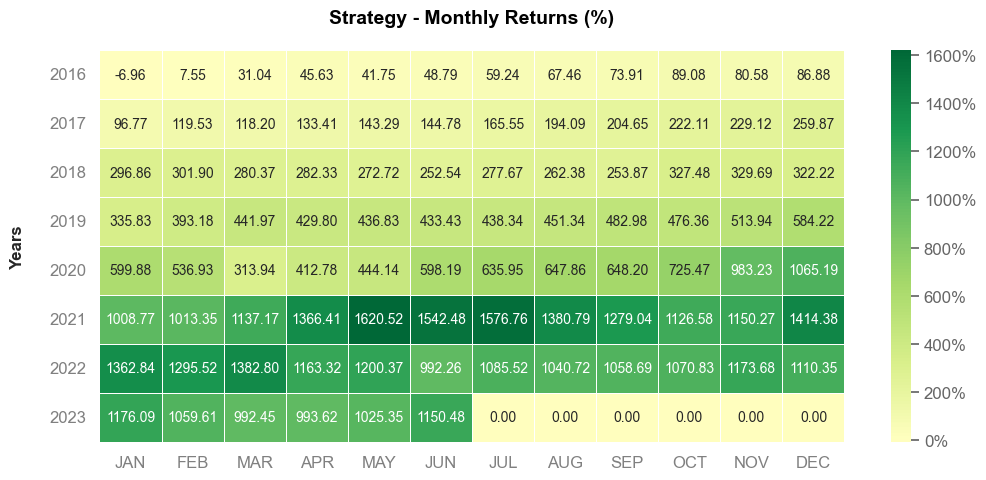

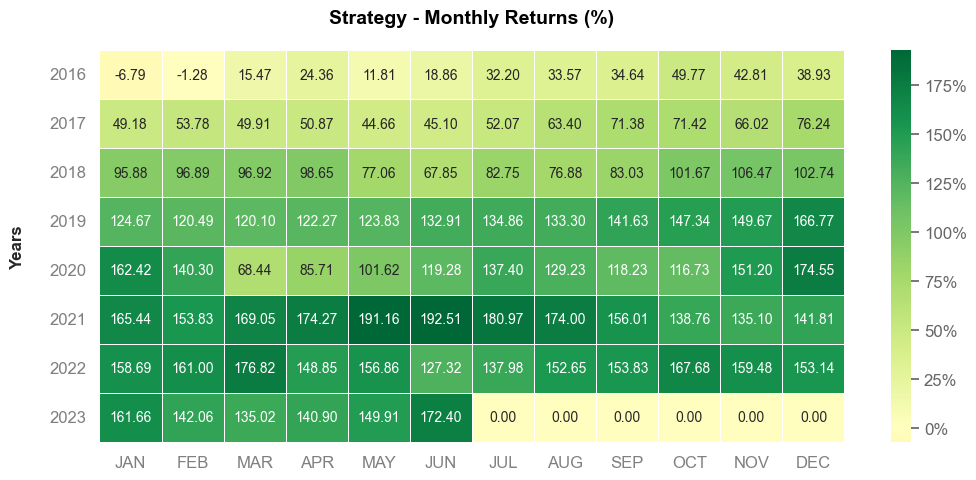

In [51]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)

rentabilidade_por_carteiras['modelo'].plot_monthly_heatmap()
rentabilidade_por_carteiras['ibovespa'].plot_monthly_heatmap()

<Axes: xlabel='data'>

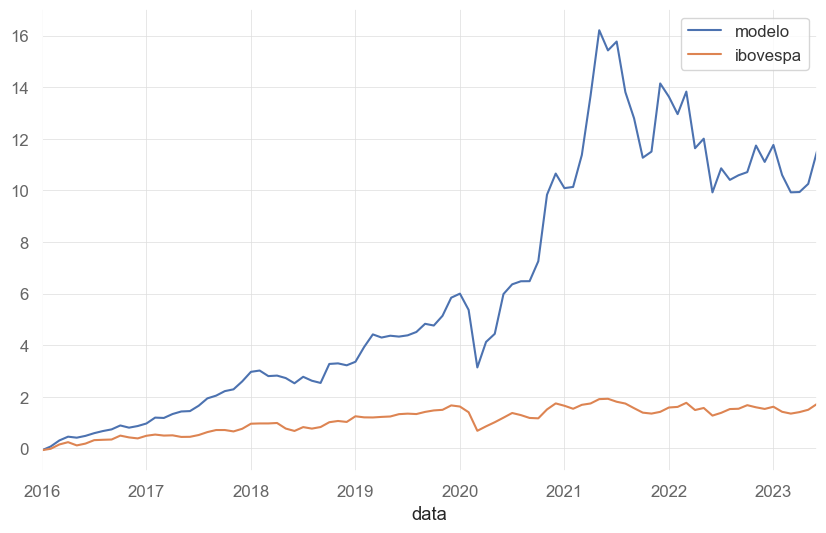

In [52]:
rentabilidade_por_carteiras.plot()

In [53]:
rentabilidade_ao_ano = (1 + rentabilidade_por_carteiras.loc['2023-06-30', 'modelo']) ** (1/7.5) - 1

rentabilidade_ao_ano

0.40047940152735406